In [2]:
import os
import sys
import pandas as pd
sys.path.append('../Scripts')
from Credit_Card_Fraud_Preprocessing import CreditCardFraudPreprocessing

Missing values handled in creditcard_df using strategy: mean
Missing values handled in fraud_df. Numeric columns imputed with mean, categorical columns with 'most_frequent'.
Duplicates removed - Creditcard dataset: 1081
Duplicates removed - Fraud dataset: 0
Univariate Analysis for Credit Card Dataset:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count 

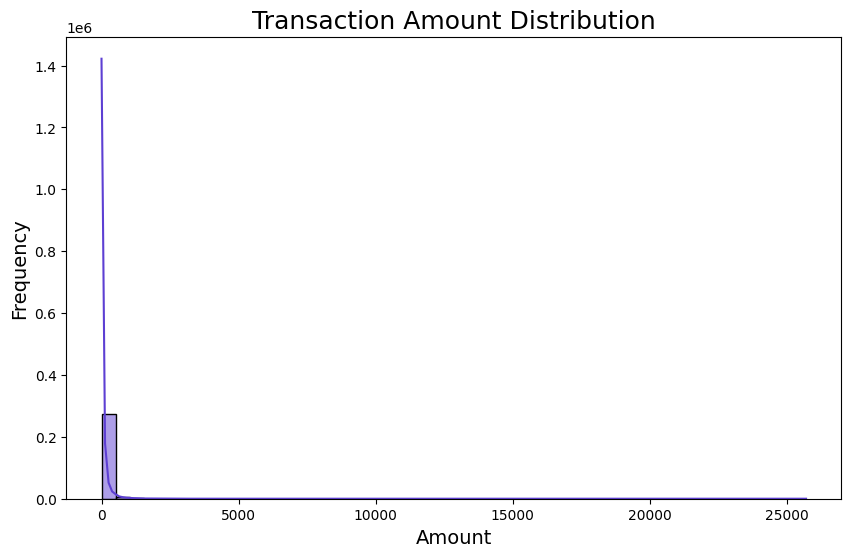

d:\10 ACADAMY KIFIYA\Week 8 & 9\detection-of-fraud-cases-for-e-commerce-and-bank-transactions\Notebooks\../Scripts\Credit_Card_Fraud_Preprocessing.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=self.creditcard_df, palette=['#5D3FD3', '#FFBF00'])


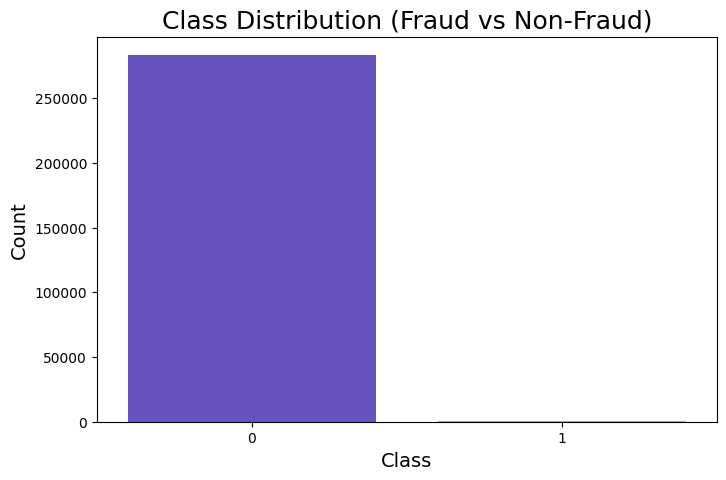

Univariate Analysis for Fraud Dataset:
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [3]:
# Create an instance of the CreditCardFraudPreprocessing class
fraud_preprocessor = CreditCardFraudPreprocessing()

# Load the datasets
# The datasets are automatically loaded during initialization, so no need to call this separately

# Handle missing values in the credit card dataset
fraud_preprocessor.handle_missing_values(data_type='creditcard', strategy='mean')

# Handle missing values in the fraud dataset
fraud_preprocessor.handle_missing_values(data_type='fraud', strategy='mean')

# Clean the credit card dataset by removing duplicates and correcting data types
fraud_preprocessor.data_cleaning(data_type='creditcard')

# Clean the fraud dataset
fraud_preprocessor.data_cleaning(data_type='fraud')

# Perform exploratory data analysis on the credit card dataset
fraud_preprocessor.eda(data_type='creditcard')

# Perform exploratory data analysis on the fraud dataset
fraud_preprocessor.eda(data_type='fraud')





In [4]:
fraud_preprocessor.save_cleaned_data(data_type='fraud', file_name='cleaned_fraud_data.csv')
fraud_preprocessor.save_cleaned_data(data_type='creditcard', file_name='cleaned_creditcard_data.csv')

Cleaned fraud_df saved as cleaned_fraud_data.csv in ../Data/
Cleaned creditcard_df saved as cleaned_creditcard_data.csv in ../Data/


In [6]:
df=pd.read_csv('../Data/Processed_Fraud_Data.csv')
df['class_1.0'] 
# Count the number of 0's and 1's in the 'class_1.0' column
class_counts = df['class_1.0'].value_counts()

# Display the counts
print("Count of 0's:", class_counts[0])
print("Count of 1's:", class_counts[1])

Count of 0's: 136961
Count of 1's: 14151


In [3]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df1 = pd.read_csv('../Data/cleaned_fraud_data.csv')

# Step 2: Check the class distribution
class_counts = df1['class'].value_counts()
print("Count of 0's:", class_counts[0])
print("Count of 1's:", class_counts[1])

# Step 3: Separate features and target variable
X = df1.drop('class', axis=1)  # Features
y = df1['class']                # Target variable

# Step 4: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to undersample the majority class
def undersample_majority(X_train, y_train):
    """Undersample the majority class to balance the dataset."""
    print("Before undersampling:", y_train.value_counts())
    
    # Initialize the RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    
    # Fit and apply the undersampling
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
    
    print("After undersampling:", y_resampled.value_counts())
    
    return X_resampled, y_resampled

# Step 5: Undersample the majority class
X_train_balanced, y_train_balanced = undersample_majority(X_train, y_train)
balanced_df = pd.DataFrame(X_train_balanced, columns=X.columns)
balanced_df['class'] = y_train_balanced
balanced_df.to_csv('../Data/balanced_fruad_data.csv', index=False)
# Optional: Check the balanced training set class distribution
print("Balanced class distribution in training set:")
print(y_train_balanced.value_counts())


Count of 0's: 136961
Count of 1's: 14151
Before undersampling: class
0.0    109568
1.0     11321
Name: count, dtype: int64
After undersampling: class
0.0    11321
1.0    11321
Name: count, dtype: int64
Balanced class distribution in training set:
class
0.0    11321
1.0    11321
Name: count, dtype: int64


In [5]:
df2=pd.read_csv('../Data/balanced_fruad_data.csv')
df2        

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,206711.0,2015-08-09 13:49:41,2015-11-20 23:46:14,16.0,DKPSGZHTPOZZM,SEO,IE,F,31.0,3.405838e+08,0.0
1,91563.0,2015-08-03 17:22:14,2015-10-15 07:17:59,45.0,TGQPBGLMGEVXT,Ads,Chrome,M,33.0,3.482311e+09,0.0
2,244574.0,2015-02-24 02:07:55,2015-06-10 18:17:56,22.0,TSNDEJOGGKEQR,SEO,IE,M,32.0,1.582936e+09,0.0
3,211901.0,2015-01-12 16:42:54,2015-04-08 05:35:05,75.0,HOBSXODMWQKBZ,SEO,Chrome,F,30.0,1.848455e+09,0.0
4,179080.0,2015-06-30 21:30:43,2015-10-07 07:23:12,51.0,RDZQNIZSNLHVG,Direct,Chrome,F,38.0,2.060873e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22637,15203.0,2015-03-21 04:45:22,2015-04-15 07:02:40,13.0,YXXZNCPBAXHKG,Direct,Chrome,M,39.0,1.264017e+09,1.0
22638,311287.0,2015-01-01 09:31:19,2015-01-01 09:31:20,34.0,QEAFUMJNWECHM,Ads,FireFox,M,23.0,2.395147e+09,1.0
22639,294782.0,2015-03-27 13:47:59,2015-05-04 08:27:56,9.0,RQHWJNLXOKCYO,SEO,IE,M,19.0,5.859507e+08,1.0
22640,282607.0,2015-01-04 06:43:12,2015-01-04 06:43:13,60.0,VSZLPCXAISHQC,SEO,Chrome,F,35.0,2.614813e+08,1.0
